<a href="https://colab.research.google.com/github/Younes-Karimi/IST597-DataPrivacy/blob/main/DifferentialPrivacy_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSU IST 597: Homework 2
## Differential Privacy

### Instructions
This assignment follows the same principles as our hands-on in-class activities, and centers around concepts we've discussed in our differential privacy module.

To ensure that the notebook runs, I've defined a function your_code_here() that simply returns the number 1. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to your_code_here() in place or insert dummy values so that the cell does not throw an error when it runs.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.
The point value of each question is listed with the question, and these add up to 100 points. The assignment is due by 9:00am on Wednesdsay, March 24. (Each day late is a 10 point deduction.) When you have finished your assignment, please submit it via Canvas.

### Preamble

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Our usual dataset
from google.colab import drive
drive.mount('/content/drive')
dir = '/content/drive/My Drive/data_privacy/'
adult_data = pd.read_csv(dir+"adult_with_pii.csv")

# adult_data = pd.read_csv("adult_with_pii.csv")
adult_data['DOB'] = pd.to_datetime(adult_data['DOB'], errors='coerce')
display(adult_data.head(10))

# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def your_code_here():
    return 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,2067-09-07,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,1988-06-07,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,1991-08-06,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,2009-04-06,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,2051-09-16,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,Allene Raff,2001-08-02,535-53-2336,9820,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,Clevie Schimoni,1989-10-17,787-78-1258,87125,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,Erhard Nesbeth,1971-07-25,208-67-0874,60887,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,Hedvige Fairpo,2001-08-10,691-69-7317,81548,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,Kally Ayers,1998-07-31,632-53-4141,51592,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Collaboration Statement

**You are expected to work indepdently on this assignment.** Everyone should write their *own code and responses*. You may collaborate with a classmate through *high level* discussions (only). To the extent that you do so, please describe this in the collaboration statment below.

In [ ]:
# In this cell (in markdown or a comment) write your collaboration statement

### Question 1 (1 point)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [9]:
adult_data['Martial Status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Martial Status, dtype: int64

### Question 2 (3 points)

Write code to return a differentially private version of your result from the last question. Use the definition of `laplace_mech`.

In [11]:
sensitivity = 1 # It is a counting query
epsilon = 0.1 # Parallel composition. The whole marital status column is divided into chuncks on which we call our DP mechanism (laplace_mech)
for status in adult_data['Martial Status'].unique():
    print('%s: %d' % (status, laplace_mech(adult_data['Martial Status'].value_counts().loc[status], sensitivity, epsilon)))

Never-married: 10650
Married-civ-spouse: 14970
Divorced: 4443
Married-spouse-absent: 404
Separated: 1020
Married-AF-spouse: 25
Widowed: 997


### Question 3 (3 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to the last question, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

- The privacy cost is equal to the value of epsilon that I set initially (0.1) because it is a parallel composition. The whole marital status column is divided into chuncks on which we call our DP mechanism (laplace_mech)
- I think releasing the set of unique marital status categories does not violate privacy because it is not sensitive information.
- It could violate if we only had single entries for any of these categories or if we did not have any instances of one of the possible marital statuses (which would mean any person in the dataset definitely does not have that status).

### Question 4 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, and compute the percent error of those answers. The remaining code will plot histograms of the results for each status.

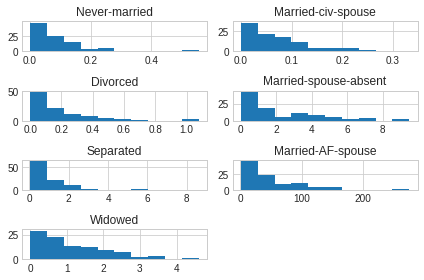

In [13]:
# Here I assume that we want to see the impact of the DP mechanism on the 
# original values in a larger scale (on average). Therefore, I do not consider 
# it as a sequential composition and did not divide the value of epsilon for 
# each query.
fig = plt.figure()

dom = adult_data['Martial Status'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
  # Repeating the original value 100 times to produce a vector of length 100
  orig_vals = [adult_data['Martial Status'].value_counts().loc[status]] * 100
  errors = [pct_error(x, laplace_mech(x, sensitivity, epsilon)) for x in orig_vals]
  ax = fig.add_subplot(4,2,num)
  ax.hist(errors, bins=10)
  ax.set_title(status)

plt.tight_layout()
plt.show()

### Question 5 (3 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

- *Married-AF-spouse* has the largest values of error and *Married-civ-spouse* has the smallest values.
- This discrepency is due to different values ranges of the number of individuals having each of those statuses. If the number increases, the the laplace mechanism would have lower impact on the value. The larger values are less impacted and the error would be also divided by a larger number and percentage seems less.
- While we may not (and are not supposed to!) get accurate results from DP queries, a rule of thumb to get meaningful and usable results could be to make sure the values are larger enough than the noise that we add.

### Question 6 (2 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [17]:
xdf = pd.crosstab(adult_data['Martial Status'], adult_data['Sex'])
xdf

Sex,Female,Male
Martial Status,,
Divorced,2672,1771
Married-AF-spouse,14,9
Married-civ-spouse,1657,13319
Married-spouse-absent,205,213
Never-married,4767,5916
Separated,631,394
Widowed,825,168


### Question 7 (3 points)

Write code to build a differentially private version of your result from the last question.

In [18]:
# We use the laplace mechanism that is defined earlier to build differentially 
# private version of the original results
for col in xdf.columns:
  xdf['DP-'+col.__str__()] = xdf.apply(\
    lambda row : int(round(laplace_mech(row[col], sensitivity, epsilon))), axis = 1)
xdf

Sex,Female,Male,DP-Female,DP-Male
Martial Status,,,,
Divorced,2672,1771,2677,1790
Married-AF-spouse,14,9,8,20
Married-civ-spouse,1657,13319,1652,13327
Married-spouse-absent,205,213,203,178
Never-married,4767,5916,4765,5904
Separated,631,394,631,390
Widowed,825,168,803,168


### Question 8 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to the last question.

In [19]:
xdf['DP-F-error'] = xdf.apply(lambda row : pct_error(row['Female'], row['DP-Female']), axis = 1)
xdf['DP-M-error'] = xdf.apply(lambda row : pct_error(row['Male'], row['DP-Male']), axis = 1)
xdf.round(decimals=2)

Sex,Female,Male,DP-Female,DP-Male,DP-F-error,DP-M-error
Martial Status,,,,,,
Divorced,2672,1771,2677,1790,0.19,1.07
Married-AF-spouse,14,9,8,20,42.86,122.22
Married-civ-spouse,1657,13319,1652,13327,0.30,0.06
Married-spouse-absent,205,213,203,178,0.98,16.43
Never-married,4767,5916,4765,5904,0.04,0.20
Separated,631,394,631,390,0.00,1.02
Widowed,825,168,803,168,2.67,0.00


### Question 9 (3 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to Question 7?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

- The privacy cost is equal to the value of epsilon which I have set it as 0.1. Because the query is parallel and does not ask for specific entries multiple times, the total cost would be still equal to epsilon.
- As it can be seen in the table above, in cells with lower number (e.g. Males that have the status of *Married-AF-spouse*) the added noise has a larger impact and may cause a considerable error percentage while the larger values (e.g. Females that has the status of *Never-married*) are less affected.

### Question 10 (5 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table.

In [20]:
tabs = pd.crosstab([adult_data['Martial Status'], adult_data['Sex']], adult_data['Education'])
for col in tabs.columns:
  tabs['DP-'+col.__str__()] = tabs.apply(lambda row : int(round(laplace_mech(row[col], sensitivity, epsilon))), axis = 1)
display(tabs)
for col in tabs.columns[:int(len(tabs.columns)/2)]:
  tabs['DP-'+col.__str__()+'-error'] = tabs.apply(lambda row : pct_error(row[col], row['DP-'+col]), axis = 1)
errors = tabs[tabs.columns[2*int(len(tabs.columns)/3):]].round(decimals=2)
display(errors)
# Because some original values are zero, the percentage of their error would be infinity (inf) because it divides the error by the original number

Education                     10th  11th  ...  DP-Prof-school  DP-Some-college
Martial Status        Sex                 ...                                 
Divorced              Female    67    79  ...              31              726
                      Male      53    51  ...              37              349
Married-AF-spouse     Female     0     0  ...              -5                1
                      Male       0     0  ...              -1                1
Married-civ-spouse    Female    33    35  ...              24              318
                      Male     316   319  ...             383             2495
Married-spouse-absent Female     7     7  ...              -9               40
                      Male       8    12  ...              11                7
Never-married         Female   128   248  ...              35             1434
                      Male     233   338  ...              60             1512
Separated             Female    31    28  ...              16              140
                      Male      18    20  ...             -28               97
Widowed               Female    29    35  ...              16              156
                      Male      10     3  ...               6               20

[14 rows x 32 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


Education                     DP-10th-error  ...  DP-Some-college-error
Martial Status        Sex                    ...                       
Divorced              Female          14.93  ...                   2.11
                      Male            18.87  ...                   2.51
Married-AF-spouse     Female            inf  ...                  50.00
                      Male              inf  ...                   0.00
Married-civ-spouse    Female          24.24  ...                   1.55
                      Male             0.63  ...                   0.00
Married-spouse-absent Female         142.86  ...                  13.04
                      Male           237.50  ...                  76.67
Never-married         Female           0.78  ...                   0.49
                      Male             3.00  ...                   1.34
Separated             Female          19.35  ...                   6.87
                      Male             5.56  ...                   8.99
Widowed               Female         127.59  ...                   2.63
                      Male            50.00  ...                   0.00

[14 rows x 16 columns]

### Question 11 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in Question 10? Why?
- The contingency table in the last question contains 3 variables, compared to 2 in the table from earlier. Is the privacy cost for the table in Question 10 different from the privacy cost in Question 7? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?

- The privacy cost is equal to the epsilon that I set as 0.1 earlier because the queries are disjoint and are counting different parts of the same dataset which makes it a parallel composition.
- No the privacy cost is the same and is equal to the epsilon that I have chosen. Because the whole dataset is divided into several disjoint chunks of data and we perform the same queries on different chunks and each individual can be in exactly one of these chunks and will be queried only once in both questions.
- In general, it does not affect the privacy cost because it only divides the dataset into smaller disjoint chunks each of which contain none or several individual data, but no one belongs to multiple chunks to be queried multiple times.
- Increasing variables (from 2 to 3 in this case) causes each cell to have smaller values, thus being prone to be impacted more by the added noise. So in general, more variables may reduce the accuracy.

### Question 12 (2 points)

Define a function `z_clip` that clips elements of its input to lie below `b`. You may assume that no input will be less than 0.

In [24]:
def z_clip(xs, b):
  return [min(x, b) for x in xs]

### Question 13 (3 points)

Write code to (1) clip the values of the `Capital Gain` column of the dataset, and (2) compute the average of the clipped values. Run your code for various values of the clipping parameter `b`.

In [45]:
cg = adult_data['Capital Gain']
print('Average of original values: %.2f\n' % np.mean(cg))
bs = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 90000, 99998, 100000, 200000]
for b in bs:
  print('Average clipped values for b=%d: ' % b, np.mean(z_clip(cg, b)).round(decimals=2))
print('\nSensitivity at b=99999: %.2f' % ((max(cg)-min(cg))/len(cg)))

Average of original values: 1077.65

Average clipped values for b=100:  8.33
Average clipped values for b=200:  16.64
Average clipped values for b=500:  41.57
Average clipped values for b=1000:  82.64
Average clipped values for b=2000:  162.44
Average clipped values for b=5000:  352.41
Average clipped values for b=10000:  526.56
Average clipped values for b=20000:  672.84
Average clipped values for b=50000:  833.5
Average clipped values for b=90000:  1028.82
Average clipped values for b=99998:  1077.64
Average clipped values for b=100000:  1077.65
Average clipped values for b=200000:  1077.65

Sensitivity at b=99999: 3.07


### Question 14 (5 points)

Write code to return the differentially private average of `Capital Gain` parameterized by the clipping parameter `b`. Run your code for various values of `b` and determine the error introduced for each value of `b`. 

*Note*: Your output should look something like the triple ('b', 'answer', 'pct_error').

In [47]:
# Here I assume that we want to see the impact of the DP mechanism on the 
# clipped values in a larger scale and as the parameter b changes. Therefore, 
# I do not consider it as a sequential composition and did not divide the value 
# of epsilon for each query.
epsilon = 0.1
cg_avg_orig = np.mean(cg)
for b in bs:
  clipped = z_clip(cg, b)
  sensitivity = (max(clipped)-min(clipped)) / len(clipped) # Average query
  print('> Sensitivity: %.2f' % sensitivity)
  dp_value = laplace_mech(np.mean(clipped), sensitivity, epsilon)
  print(tuple((b, dp_value.round(decimals=2), pct_error(cg_avg_orig, dp_value).round(decimals=2))))

> Sensitivity: 0.00
(100, 8.33, 99.23)
> Sensitivity: 0.01
(200, 16.67, 98.45)
> Sensitivity: 0.02
(500, 41.29, 96.17)
> Sensitivity: 0.03
(1000, 83.73, 92.23)
> Sensitivity: 0.06
(2000, 162.94, 84.88)
> Sensitivity: 0.15
(5000, 343.95, 68.08)
> Sensitivity: 0.31
(10000, 524.79, 51.3)
> Sensitivity: 0.61
(20000, 675.88, 37.28)
> Sensitivity: 1.54
(50000, 829.78, 23.0)
> Sensitivity: 2.76
(90000, 1094.72, 1.58)
> Sensitivity: 3.07
(99998, 1074.06, 0.33)
> Sensitivity: 3.07
(100000, 1092.62, 1.39)
> Sensitivity: 3.07
(200000, 1112.64, 3.25)


### Question 15 (5 points)

In 5-10 sentences, answer the following:

- In Question 13, at approximately what value of the clipping parameter `b` does the clipped average approach the original (un-clipped) average?
- What is the sensitivity of the clipped average at this value of `b`, and why?
- In Question 14, at approximately what value of the clipping parameter `b` is the error minimized?
- Which seems to be more important for accuracy - the value of `b` or the scale of the noise added? Why?
- Do you think the answer to the previous point will be true for every dataset? Why or why not?

- At b=99999 the clipped average approaches the original value because the maximum value in cg is 99999
- The sensitivity at this value of b (as printed above) is equal to 3.07
- After around b=90000 the error becomes mostly less than 10%
- Both of them can be important depending on the range of values and their importance can change depending on how large the original value is. For larger values of average, the scale of noise becomes less important and clipping with a relatively small *b* can have large impact. For example, original average here is around 1000 and for *b=100*, the average of the clipped values (~8) is much more different from the original value and has larger impact compared to scale of noise. Moreover, *b* can affect the scale of noise because *b* may change the range of values, so the sensitivity (as printed for different values of *b* in the cell above).
- No, again as stated above, depending on the range of values it may change.

### Question 16 (10 points)

Write a function `auto_avg` that returns the differentially private average of an array of values `xs`. Your function should **automatically** determine the clipping parameter `b`, and should enforce differential privacy for a **total** privacy cost of `epsilon`.

In [230]:
def auto_avg(xs, epsilon):
  # b_range_0 = [100, 1000, 10000, 100000, 1000000]
  b_range = range(10000,200000,10000)
  n = len(b_range)
  epsilon_i = epsilon / n # It is a sequential composition
  prev = 0
  minimum_diff = 0
  avg = 0
  b_optim = b_range[-1]
  for b in b_range:
    clipped = z_clip(xs, b)
    sensitivity = (max(clipped)-min(clipped)) / len(clipped) # Average query
    dp = laplace_mech(np.mean(clipped), sensitivity, epsilon_i)
    if minimum_diff == 0:
      minimum_diff = dp-prev
    if abs(dp-prev)<minimum_diff:
      print('Average for b=%d: %.2f' % (b, dp))
      minimum_diff = abs(dp-prev)
      b_optim = b
      avg = dp
    prev = dp
  print('The best clipping parameter b: ', b_optim)
  return avg

In [232]:
# Calculating the average for the previous problem (Capital Gain)
print('{:.2f}'.format(auto_avg(cg, 10)))

Average for b=20000: 672.26
Average for b=30000: 737.93
Average for b=40000: 785.65
Average for b=60000: 878.58
Average for b=110000: 1080.37
The best clipping parameter b:  110000
1080.37


### Question 17 (8 points)

In 5-10 sentences, answer the following:
- Summarize (1-2 sentences only) your approach in `auto_avg`.
- Briefly argue that your implementation has privacy cost of `epsilon`.
- How close is your function able to get to the "best" result you got in Question 14? What accounts for the difference?
- Will your approach work well for **all** datasets? If not, describe a dataset for which it is likely to return very inaccurate results.

- This function iterates over a predefined set for values of *b* and calculates the DP average values and keeps track of the minimum difference between each step of *b* and returns the value of DP and prints the value of *b* for when this difference is minimum.
- I perform multiple sequential queries to obtain the answers for differnet values of *b*. Therefore, the total epsilon should be divided to the number of queries (length of *b_range*), and then be used for generating noise so that the total epsilon becomes equal to he specified epsilon.
- It is fairly close. The accuracy would depend on the range and values of *b* and the number of queries (*len(b_range)*). If we use *b_range_0* with fewer values and closer to the maximum value in the vector, the results might be more accurate.
- No, here I assumed that I should not use the range of the actual data and write an approach without seeing the data, but still I knew that the data type is Capital Gain and approximately what range of values it may have (e.g. the steps of b). If we have less information about the data type, more queries with smaller steps and larger span of *b* would be required.

### Question 18 (3 points)

Consider the code below, which graphs the total privacy cost of an averaging attack under (1) sequential composition and (2) advanced composition, for values of `k` between 1 and 200.

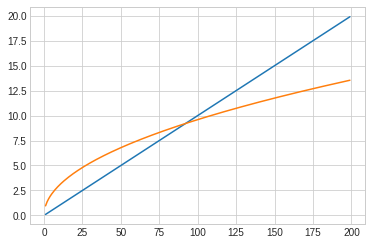

In [233]:
epsilon = .1
delta_p = 1e-5

def query():
    return len(adult_data[adult_data['Martial Status'] == 'Divorced'])

def avg_attack(k):
    return np.mean([laplace_mech(query(), 1, epsilon) for i in range(k)])
    
xs = range(1, 200)
privacy_cost_sequential = [k * epsilon for k in xs]
privacy_cost_advanced = [2 * epsilon * np.sqrt(2 * k * np.log(1/delta_p)) for k in xs]

plt.plot(xs, privacy_cost_sequential);
plt.plot(xs, privacy_cost_advanced);

In 2-5 sentences, answer the following:
- At approximately what point do the lines representing the two approaches cross? What does this mean about **which** composition technique should be used for an iterative algorithm?
- The two lines represent **different** privacy costs for the **same** algorithm. How can both be correct?

- The two lines cross approximately around 90. For values lower than 90, sequential composition and for higher values, advanced composition should be used.
- This is because these are upper bounds for the privacy cost and sequential privacy provides a looser upper bound. This is especially considerable for higher values, in which advanced composition has a more realistic (lower) upper bound on the cost compared to a looser bound in sequential composition.

### Question 19 (3 points)

In the cell below, define a function that implements the vector version of the Laplace mechanism.

In [234]:
def laplace_mech_vec(qs, sensitivity, epsilon):
  noise = np.random.laplace(loc=0, scale=sensitivity / epsilon)
  return [v + noise for v in qs] # This assures that the same value of noise would be added to all the elements

### Question 20 (3 points)

In the cell below, define a function that implements the vector version of the Gaussian mechanism.

In [235]:
def gaussian_mech_vec(qs, sensitivity, epsilon, delta):
  sigma = np.sqrt(2 * np.log(1.25 / delta)) * sensitivity / epsilon
  noise = np.random.normal(loc=0, scale=sigma)
  return [v + noise for v in qs] # This assures that the same value of noise would be added to all the elements

### Question 21 (4 points)

Consider the code below, which defines three average queries and runs them on `adult_data`.

In [242]:
b_capgain = 3000
b_year = 3000
b_age = 3000

n = len(adult_data)

def query1():
    return np.sum(z_clip(adult_data['Capital Gain'], b_capgain))/n

def query2():
    return np.sum(z_clip(adult_data['DOB'].dt.year, b_year))/n

def query3():
    return np.sum(z_clip(adult_data['Age'], b_age))/n

def my_query():
    return [query1(), query2(), query3()]

my_query()

[235.98968090660605, 2013.803599398053, 38.58164675532078]

In 2-5 sentences, answer the following:
- What is the $L_1$ sensitivity of `my_query`, and why?
- What is the $L_2$ sensitivity of `my_query`, and why?

- The $L_1$ sensitivity is equal to sum of elementwise sensitivities: $S_1$, $S_2$, and $S_3$.<br>
$S_i=\frac{max(values_i)-min(values_i)}{len(values_i)}$<br>
For simplicity (because it seems like this based on the same values for clipping and *n*), if we assume all the values in the output of these queries are clipped (and have value) between 0 and 3000, then all the sensitivities would be equal to $\frac{3000}{n}$ and the $L_1$ sensitivity would be equal to $\frac{9000}{n}$. But, I will calculate the actual values in the cell below.
- The $L_2$ sensitivity is equal to the square root of sum of elementwise sensitivities: $\sqrt{S_1+S_2+S_3}$ (calculated below)

In [268]:
import math
s1 = (max(z_clip(adult_data['Capital Gain'], b_capgain))-min(z_clip(adult_data['Capital Gain'], b_capgain)))/n
s2 = (max(z_clip(adult_data['DOB'].dt.year, b_year))-min(z_clip(adult_data['DOB'].dt.year, b_year)))/n
s3 = (max(z_clip(adult_data['Age'], b_age))-min(z_clip(adult_data['Age'], b_age)))/n
l1_sensitivity = 9000/n
l2_sensitivity = math.sqrt(9000/n)
print('Precise L_1 sensitivity: %.3f' % (s1+s2+s3))
print('Approximate L_1 sensitivity: %.3f' % l1_sensitivity)
print('Precise L_2 sensitivity: %.3f' % math.sqrt(s1+s2+s3))
print('Approximate L_2 sensitivity: %.3f' % l2_sensitivity)

Precise L_1 sensitivity: 0.097
Approximate L_1 sensitivity: 0.276
Precise L_2 sensitivity: 0.312
Approximate L_2 sensitivity: 0.526



### Question 22 (6 points)

In the cell below, write code to release the results of calling `my_query()` with differential privacy, without using sequential composition.

*Hint*: use `laplace_mech_vec`, but be careful of sensitivity!

In [269]:
# I set epsilon as 0.1 and use the approximate l1_sensitivity calculated in 
# the previous question because Laplace mechanism only uses L_1 sensitivity.
# Also, this sensitivity would be used to generate a unique noise for all the 
# elements of the vector
epsilon = 0.1
laplace_mech_vec(my_query(), l1_sensitivity, epsilon)

[232.16354057314288, 2009.9774590645898, 34.75550642185761]

### Question 23 (4 points)

In 2-5 sentences, answer the following:
- What is the total privacy cost of your answer to Question 22, and why?

- The total privacy cost is equal to epsilon (0.1) because I did not use a sequential query and instead, used the three queries in a vector the sensitivity of which would be different from (larger than) the sensitivity of each individual query

### Question 24 (6 points)

In the cell below, write code to release the results of `my_query()` with differential privacy, but using the Gaussian mechanism.

In [270]:
# Iset the values of epsilon and delta as before, but I use L_2 sensitivity here
# that was calculated earlier. The Gaussian mechanism allows us to use either of
# the L_1 or L_2 norms for calculating the sensitivity, but L_2 may have lower
# values for larger numbers (because of the square root function).
delta = 1e-5
epsilon = 0.1
gaussian_mech_vec(my_query(), l2_sensitivity, epsilon, delta)

[215.34701701660458, 1993.1609355080514, 17.938982865319307]

### Extra Credit

You may earn up to 10 points of extra credit on this homework by providing *narrated proofs* of the Sequential and Parallel Composition Theorems. You must prove the Theorems as they are stated on the class slides, following the same notation. Understanding that these proofs are well-known and you may look them up, I am requesting that you *narrate* your proof completely.  That is, for each step in the proof, provide narrative justification for this step. The proof of each Theorem will be graded on a 5 point scale.

You should upload your proofs as a separate file. Please type your responses. You may use LaTeX or Word. The same collaboration guidelines apply here. You are required to work indepedently.

A separate PDF file is submitted